# Goal: Identify whether each person is wearing a safety helmet and vest or not

## Step 1: Finetune yolo11n model to detect helmets and vests

In [30]:
#!pip install ultralytics

In [27]:
import cv2
import gc
import logging
import matplotlib.pyplot as plt
import os
import shutil
import torch

from collections import deque
from IPython.display import display, Image
from PIL import Image
from tqdm import tqdm
from ultralytics import YOLO

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [4]:
dataset_path = '/kaggle/input/safety-helmet-and-reflective-jacket'

In [5]:
# Define YOLOv8 training settings
data_yaml = f"""
path: {dataset_path}/safety-Helmet-Reflective-Jacket
train: train/images
val: valid/images
test: test/images

nc: 2
names: ['helmet', 'jacket']
"""

# Save data.yaml
with open("data.yaml", "w") as f:
    f.write(data_yaml)

In [25]:
# Load YOLO11n model 
model = YOLO('yolo11n.pt')

In [28]:
gc.collect()
torch.cuda.empty_cache()

In [29]:
# Train the model
model.train(data='data.yaml', epochs=10, batch=4, imgsz=640, device=device, workers=8)

engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=data.yaml, epochs=10, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False,

train: Scanning /kaggle/input/safety-helmet-and-reflective-jacket/safety-Helmet-Reflective-Jacket/train/labels... 7350 images, 33 backgrounds, 0 corrupt: 100%|██████████| 7350/7350 [00:11<00:00, 644.31it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/safety-helmet-and-reflective-jacket/safety-Helmet-Reflective-Jacket/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/safety-helmet-and-reflective-jacket/safety-Helmet-Reflective-Jacket/valid/labels... 1575 images, 8 backgrounds, 0 corrupt: 100%|██████████| 1575/1575 [00:02<00:00, 713.02it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/safety-helmet-and-reflective-jacket/safety-Helmet-Reflective-Jacket/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train7
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10     0.699G      1.318      1.778      1.377         10        640: 100%|██████████| 1838/1838 [03:10<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 197/197 [00:14<00:00, 13.66it/s]


                   all       1575       5292      0.805      0.686      0.787      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      0.83G      1.285      1.231      1.341          3        640: 100%|██████████| 1838/1838 [03:04<00:00,  9.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 197/197 [00:14<00:00, 13.46it/s]

                   all       1575       5292      0.805      0.726       0.82      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      0.83G      1.237      1.093      1.314          4        640: 100%|██████████| 1838/1838 [03:01<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 197/197 [00:14<00:00, 13.95it/s]


                   all       1575       5292      0.818      0.775      0.857      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      0.83G      1.175     0.9907      1.273         15        640: 100%|██████████| 1838/1838 [03:00<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 197/197 [00:14<00:00, 13.71it/s]

                   all       1575       5292      0.867       0.81      0.892      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      0.83G      1.117      0.909      1.237          8        640: 100%|██████████| 1838/1838 [03:02<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 197/197 [00:12<00:00, 15.40it/s]


                   all       1575       5292      0.872      0.816      0.901      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      0.83G      1.061     0.8324      1.198          6        640: 100%|██████████| 1838/1838 [03:03<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 197/197 [00:14<00:00, 13.84it/s]

                   all       1575       5292      0.891      0.839      0.918      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      0.83G      1.028      0.776      1.173          3        640: 100%|██████████| 1838/1838 [03:00<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 197/197 [00:13<00:00, 15.10it/s]


                   all       1575       5292       0.89      0.853      0.927      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      0.83G     0.9845     0.7168      1.145         11        640: 100%|██████████| 1838/1838 [02:57<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 197/197 [00:14<00:00, 13.91it/s]

                   all       1575       5292      0.906      0.853      0.931      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      0.83G     0.9445      0.671      1.121          7        640: 100%|██████████| 1838/1838 [02:58<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 197/197 [00:14<00:00, 14.06it/s]

                   all       1575       5292      0.891       0.88      0.938      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      0.83G     0.9076     0.6341        1.1          5        640: 100%|██████████| 1838/1838 [02:58<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 197/197 [00:14<00:00, 13.77it/s]

                   all       1575       5292      0.912      0.874      0.945      0.722



10 epochs completed in 0.546 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 5.5MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics 8.3.93 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 197/197 [00:13<00:00, 15.11it/s]


                   all       1575       5292      0.912      0.874      0.945      0.722
                helmet       1290       2966      0.938      0.883      0.955      0.728
                jacket       1317       2326      0.886      0.864      0.935      0.716


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train7


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x788fd11e14b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [31]:
# Save model weights
shutil.move("runs/detect/train7/weights/best.pt", "/kaggle/working/yolo11n_safety.pt")

'/kaggle/working/yolo11n_safety.pt'

### Show finetuned model performance on test images

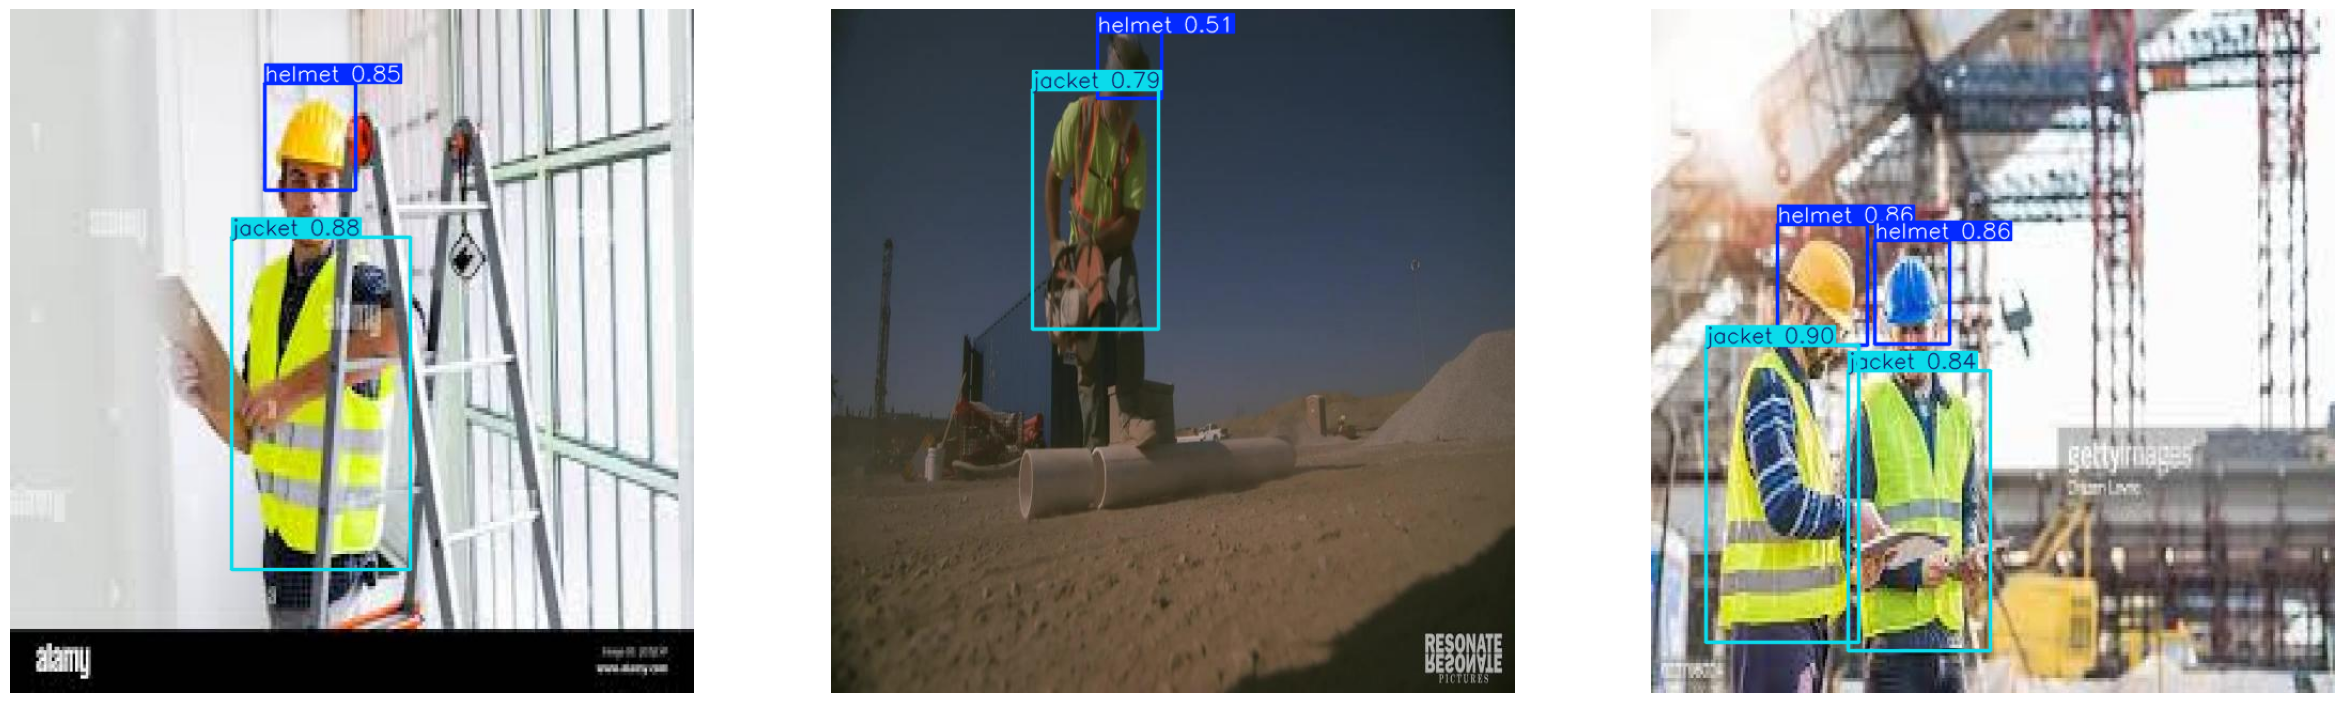

In [47]:
model = YOLO("/kaggle/working/yolo11n_safety.pt")  

test_images = os.listdir(f"{dataset_path}/safety-Helmet-Reflective-Jacket/test/images")
test_image_paths = [f"{dataset_path}/safety-Helmet-Reflective-Jacket/test/images/{img}" for img in test_images[:3]]  

results = [model(img_path, conf=0.5)[0] for img_path in test_image_paths]

# Create a Figure with 5 Subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 10))  

for ax, result in zip(axes, results):
    result_img = Image.fromarray(result.plot()[:, :, ::-1])  # Convert to PIL Image
    ax.imshow(result_img)
    ax.axis("off")  

plt.show()

## Step 2: Make detections

In [184]:
# Suppress YOLO logging output
logging.getLogger('ultralytics').setLevel(logging.CRITICAL)

In [185]:
# Path to input and output video
video_path = "/kaggle/working/input_video_1.mp4"
output_video_path = "/kaggle/working/output_video_1.avi"

In [186]:
# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [187]:
# Load YOLO models
person_model = YOLO('yolo11x.pt')  
helmet_jacket_model = YOLO("/kaggle/working/yolo11n_safety.pt")  

In [188]:
# Open the video
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Define video writer
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

In [189]:
# Define confidence thresholds
person_confidence_threshold = 0.8
helmet_and_jacket_confidence_threshold = 0.5
iou_threshold = 0.7

In [190]:
# Initialize tracking variables
tracked_people = {}
next_person_id = 1
max_frames_missing = 3  # Maximum frames a person can be missing before assigning a new ID

In [191]:
def calculate_iou(box1, box2):
    x1, y1, x2, y2 = box1
    x1_, y1_, x2_, y2_ = box2
    
    xi1 = max(x1, x1_)
    yi1 = max(y1, y1_)
    xi2 = min(x2, x2_)
    yi2 = min(y2, y2_)
    
    inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)
    box1_area = (x2 - x1) * (y2 - y1)
    box2_area = (x2_ - x1_) * (y2_ - y1_)
    
    iou = inter_area / float(box1_area + box2_area - inter_area)
    return iou

In [192]:
# 8/10 rule that checks for 8 different detections in the queue
def helmet_8_10_rule(initial_detection, detections):
    count_different = detections.count(initial_detection == "HELMET") 
    return count_different <= 2

def jacket_8_10_rule(initial_detection, detections):
    count_different = detections.count(initial_detection == "JACKET")  
    return count_different <= 2

In [193]:
# Initialize the progress bar using the total frame count
progress_bar = tqdm(total=frame_count, desc="Processing Video", unit="frame")

# Process frames with the progress bar
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  

    # 1st STEP: Detect people
    person_results = person_model(frame)

    person_boxes = [] # [pos1, pos2, ..., posn]
    for person in person_results[0].boxes.data:
        class_id = int(person[5])  
        confidence = float(person[4])  

        if class_id == 0 and confidence >= person_confidence_threshold:
            x1, y1, x2, y2 = map(int, person.tolist()[:4])  
            person_boxes.append((x1, y1, x2, y2))

    # Initialize current frame detections
    current_frame_detections = {}

    # Loop over detected persons
    for (x1, y1, x2, y2) in person_boxes:
        person_roi = frame[y1:y2, x1:x2]

        # 2nd STEP: Detect helmet & jacket
        helmet_jacket_results = helmet_jacket_model(person_roi)

        helmet_detected = False
        jacket_detected = False

        # Analyze helmet & jacket detections 
        for detection in helmet_jacket_results[0].boxes.data:
            class_id = int(detection[5])  
            confidence = float(detection[4])  

            if confidence >= helmet_and_jacket_confidence_threshold:  
                if class_id == 0:  
                    helmet_detected = True
                elif class_id == 1:  
                    jacket_detected = True

        # Assign label based on detection
        current_frame_detections[(x1, y1, x2, y2)] = (helmet_detected, jacket_detected)

    # Match current frame detections with tracked people
    matched_ids = set()
    for person_id, person_data in tracked_people.items():
        best_iou = 0
        best_box = None
        for box in current_frame_detections.keys():
            iou = calculate_iou(person_data['last_box'], box)
            if iou > best_iou:
                best_iou = iou
                best_box = box

        if best_iou > iou_threshold:  
            helmet_detected, jacket_detected = current_frame_detections[best_box]
            person_data['helmet_queue'].append(helmet_detected)
            person_data['jacket_queue'].append(jacket_detected)
            
            # Keep only the last 10 detections for each label (helmet & jacket)
            if len(person_data['helmet_queue']) > 10:
                person_data['helmet_queue'].popleft()
            if len(person_data['jacket_queue']) > 10:
                person_data['jacket_queue'].popleft()

            person_data['last_box'] = best_box
            person_data['frames_missing'] = 0
            matched_ids.add(person_id)
            del current_frame_detections[best_box]
        else:
            person_data['frames_missing'] += 1 # person is not detected on current frame

    # Handle unmatched detections (new people)
    for box, (helmet_detected, jacket_detected) in current_frame_detections.items():
        initial_helmet_detection = "HELMET" if helmet_detected else "NO HELMET"
        initial_jacket_detection = "JACKET" if jacket_detected else "NO JACKET"
        tracked_people[next_person_id] = {
            'helmet_queue': deque([helmet_detected]),
            'jacket_queue': deque([jacket_detected]),
            'last_box': box,
            'frames_missing': 0,
            'initial_helmet_detection': initial_helmet_detection,  # Save initial helmet detection
            'initial_jacket_detection': initial_jacket_detection   # Save initial jacket detection
        }
        matched_ids.add(next_person_id)
        next_person_id += 1

    # Remove people who have been missing for too long
    for person_id in list(tracked_people.keys()):
        if person_id not in matched_ids:
            if tracked_people[person_id]['frames_missing'] > max_frames_missing:
                del tracked_people[person_id]

    # Draw bounding boxes and labels
    for person_id, person_data in tracked_people.items():
        x1, y1, x2, y2 = person_data['last_box']
        
        # Apply 8/10 rule and update detection if needed
        helmet_detection = helmet_8_10_rule(person_data['initial_helmet_detection'], list(person_data['helmet_queue']))
        jacket_detection = jacket_8_10_rule(person_data['initial_jacket_detection'], list(person_data['jacket_queue']))

        person_data['initial_helmet_detection'] = helmet_detection
        person_data['initial_jacket_detection'] = jacket_detection

        # Label person with helmet and jacket status
        if helmet_detection and jacket_detection:
            label = "Helmet & Jacket"
        elif helmet_detection:
            label = "Helmet & No Jacket"
        elif jacket_detection:
            label = "No Helmet & Jacket"
        else:
            label = "No Helmet & No Jacket"

        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    out.write(frame)    
    progress_bar.update(1)  

cap.release()
out.release()
progress_bar.close()

print(f"Processed video saved at: {output_video_path}")

Processing Video: 100%|██████████| 322/322 [00:27<00:00, 11.67frame/s]

Processed video saved at: /kaggle/working/output.avi
